Trabalho C3 - Analise de Dadaos

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix





In [86]:
train = pd.read_csv('bibliotecas/train.csv')
test =  pd.read_csv('bibliotecas/test.csv')

df = pd.concat([train, test])
column_translation = {
    'SalePrice': 'PrecoVenda',
    'MSSubClass': 'ClasseEdificio',
    'MSZoning': 'ClassificacaoZona',
    'LotFrontage': 'FrenteLote',
    'LotArea': 'TamanhoLote',
    'Street': 'TipoRua',
    'Alley': 'TipoBeco',
    'LotShape': 'FormaLote',
    'LandContour': 'PlanicidadeLote',
    'Utilities': 'TipoUtilidades',
    'LotConfig': 'ConfiguracaoLote',
    'LandSlope': 'InclinacaoLote',
    'Neighborhood': 'Bairro',
    'Condition1': 'ProximidadeEstradaFerrovia1',
    'Condition2': 'ProximidadeEstradaFerrovia2',
    'BldgType': 'TipoHabitacao',
    'HouseStyle': 'EstiloHabitacao',
    'OverallQual': 'QualidadeGeral',
    'OverallCond': 'CondicaoGeral',
    'YearBuilt': 'AnoConstrucao',
    'YearRemodAdd': 'AnoRemodelacao',
    'RoofStyle': 'TipoTelhado',
    'RoofMatl': 'MaterialTelhado',
    'Exterior1st': 'RevestimentoExterior1',
    'Exterior2nd': 'RevestimentoExterior2',
    'MasVnrType': 'TipoRevestimentoAlvenaria',
    'MasVnrArea': 'AreaRevestimentoAlvenaria',
    'ExterQual': 'QualidadeMaterialExterior',
    'ExterCond': 'CondicaoMaterialExterior',
    'Foundation': 'TipoFundacao',
    'BsmtQual': 'AlturaPorão',
    'BsmtCond': 'CondicaoGeralPorão',
    'BsmtExposure': 'ParedesPorãoAcessoExterno',
    'BsmtFinType1': 'QualidadeAreaAcabadaPorão',
    'BsmtFinSF1': 'AreaAcabadaPorão1',
    'BsmtFinType2': 'QualidadeAreaAcabadaPorão2',
    'BsmtFinSF2': 'AreaAcabadaPorão2',
    'BsmtUnfSF': 'AreaNaoAcabadaPorão',
    'TotalBsmtSF': 'AreaTotalPorão',
    'Heating': 'TipoAquecimento',
    'HeatingQC': 'QualidadeCondicaoAquecimento',
    'CentralAir': 'ArCondicionadoCentral',
    'Electrical': 'SistemaEletrico',
    '1stFlrSF': 'Area1Andar',
    '2ndFlrSF': 'Area2Andar',
    'LowQualFinSF': 'AreaAcabadaBaixaQualidade',
    'GrLivArea': 'AreaEstarAcimaNivel',
    'BsmtFullBath': 'BanheirosCompletosPorão',
    'BsmtHalfBath': 'MeiosBanheirosPorão',
    'FullBath': 'BanheirosCompletos',
    'HalfBath': 'MeiosBanheiros',
    'Bedroom': 'NumeroQuartos',
    'Kitchen': 'NumeroCozinhas',
    'KitchenQual': 'QualidadeCozinha',
    'TotRmsAbvGrd': 'TotalQuartosAcimaNivel',
    'Functional': 'AvaliacaoFuncionalidade',
    'Fireplaces': 'NumeroLareiras',
    'FireplaceQu': 'QualidadeLareira',
    'GarageType': 'LocalizacaoGaragem',
    'GarageYrBlt': 'AnoConstrucaoGaragem',
    'GarageFinish': 'AcabamentoInteriorGaragem',
    'GarageCars': 'CapacidadeGaragemCarros',
    'GarageArea': 'TamanhoGaragem',
    'GarageQual': 'QualidadeGaragem',
    'GarageCond': 'CondicaoGaragem',
    'PavedDrive': 'EntradaPavimentada',
    'WoodDeckSF': 'AreaDeckMadeira',
    'OpenPorchSF': 'AreaVarandaAberta',
    'EnclosedPorch': 'AreaVarandaFechada',
    '3SsnPorch': 'AreaVarandaTresEstacoes',
    'ScreenPorch': 'AreaVarandaTela',
    'PoolArea': 'AreaPiscina',
    'PoolQC': 'QualidadePiscina',
    'Fence': 'QualidadeCerca',
    'MiscFeature': 'CaracteristicaMisc',
    'MiscVal': 'ValorCaracteristicaMisc',
    'MoSold': 'MesVenda',
    'YrSold': 'AnoVenda',
    'SaleType': 'TipoVenda',
    'SaleCondition': 'CondicaoVenda'
}

In [87]:
# Colocando a renomeação de colunas na Tabela
df.rename(columns=column_translation, inplace=True)
df.head(15)

,Id,ClasseEdificio,ClassificacaoZona,FrenteLote,TamanhoLote,TipoRua,TipoBeco,FormaLote,PlanicidadeLote,TipoUtilidades,...,AreaPiscina,QualidadePiscina,QualidadeCerca,CaracteristicaMisc,ValorCaracteristicaMisc,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


#  <center>Analise exploratoria de Dados</center>

In [88]:
# Quantas linhas e colunas
df.shape

(2919, 81)

In [89]:
# Informando todos os tipos de dados da tabela

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            2919 non-null   int64  
 1   ClasseEdificio                2919 non-null   int64  
 2   ClassificacaoZona             2915 non-null   object 
 3   FrenteLote                    2433 non-null   float64
 4   TamanhoLote                   2919 non-null   int64  
 5   TipoRua                       2919 non-null   object 
 6   TipoBeco                      198 non-null    object 
 7   FormaLote                     2919 non-null   object 
 8   PlanicidadeLote               2919 non-null   object 
 9   TipoUtilidades                2917 non-null   object 
 10  ConfiguracaoLote              2919 non-null   object 
 11  InclinacaoLote                2919 non-null   object 
 12  Bairro                        2919 non-null   object 
 13  Proximid

In [90]:
#Iremos remover a coluna ID por ser uma repetição do index
df.drop(columns='Id',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ClasseEdificio                2919 non-null   int64  
 1   ClassificacaoZona             2915 non-null   object 
 2   FrenteLote                    2433 non-null   float64
 3   TamanhoLote                   2919 non-null   int64  
 4   TipoRua                       2919 non-null   object 
 5   TipoBeco                      198 non-null    object 
 6   FormaLote                     2919 non-null   object 
 7   PlanicidadeLote               2919 non-null   object 
 8   TipoUtilidades                2917 non-null   object 
 9   ConfiguracaoLote              2919 non-null   object 
 10  InclinacaoLote                2919 non-null   object 
 11  Bairro                        2919 non-null   object 
 12  ProximidadeEstradaFerrovia1   2919 non-null   object 
 13  Proximid

In [91]:
# Mostrando a variedade de dados unicos
df.nunique()

ClasseEdificio         16
ClassificacaoZona       5
FrenteLote            128
TamanhoLote          1951
TipoRua                 2
                     ... 
MesVenda               12
AnoVenda                5
TipoVenda               9
CondicaoVenda           6
PrecoVenda            663
Length: 80, dtype: int64

In [92]:
# Retorna todos os valores nulos de cada coluna
df.isnull().sum()

ClasseEdificio          0
ClassificacaoZona       4
FrenteLote            486
TamanhoLote             0
TipoRua                 0
                     ... 
MesVenda                0
AnoVenda                0
TipoVenda               1
CondicaoVenda           0
PrecoVenda           1459
Length: 80, dtype: int64

In [ ]:
# Excluir linhas com valores ausentes no preço de venda, pois como é a variavel que estamos tentando prever pode distorcer o resultado final
df.dropna(subset=['PrecoVenda'], inplace=True)

df.isnull().sum()

ClasseEdificio         0
ClassificacaoZona      0
FrenteLote           259
TamanhoLote            0
TipoRua                0
                    ... 
MesVenda               0
AnoVenda               0
TipoVenda              0
CondicaoVenda          0
PrecoVenda             0
Length: 80, dtype: int64

In [93]:
#criando um filtro para ver a porcentagem de cada coluna onde temos valores nulos > 0

filtro = df.isnull().sum() > 0

df.isnull().mean()[filtro]

ClassificacaoZona             0.001370
FrenteLote                    0.166495
TipoBeco                      0.932169
TipoUtilidades                0.000685
RevestimentoExterior1         0.000343
RevestimentoExterior2         0.000343
TipoRevestimentoAlvenaria     0.605002
AreaRevestimentoAlvenaria     0.007879
AlturaPorão                   0.027749
CondicaoGeralPorão            0.028092
ParedesPorãoAcessoExterno     0.028092
QualidadeAreaAcabadaPorão     0.027064
AreaAcabadaPorão1             0.000343
QualidadeAreaAcabadaPorão2    0.027407
AreaAcabadaPorão2             0.000343
AreaNaoAcabadaPorão           0.000343
AreaTotalPorão                0.000343
SistemaEletrico               0.000343
BanheirosCompletosPorão       0.000685
MeiosBanheirosPorão           0.000685
QualidadeCozinha              0.000343
AvaliacaoFuncionalidade       0.000685
QualidadeLareira              0.486468
LocalizacaoGaragem            0.053786
AnoConstrucaoGaragem          0.054471
AcabamentoInteriorGaragem

AS colunas "TipoBeco" "QualidadePiscina" "CaracteristicaMisc" possuem mais de 90% de valores nulos e por isso iremos remove-las.

In [94]:
df.drop(columns=['TipoBeco', 'QualidadePiscina', 'CaracteristicaMisc'], inplace=True)

print(df.isnull().mean()[filtro])

ClassificacaoZona             0.001370
FrenteLote                    0.166495
TipoUtilidades                0.000685
RevestimentoExterior1         0.000343
RevestimentoExterior2         0.000343
TipoRevestimentoAlvenaria     0.605002
AreaRevestimentoAlvenaria     0.007879
AlturaPorão                   0.027749
CondicaoGeralPorão            0.028092
ParedesPorãoAcessoExterno     0.028092
QualidadeAreaAcabadaPorão     0.027064
AreaAcabadaPorão1             0.000343
QualidadeAreaAcabadaPorão2    0.027407
AreaAcabadaPorão2             0.000343
AreaNaoAcabadaPorão           0.000343
AreaTotalPorão                0.000343
SistemaEletrico               0.000343
BanheirosCompletosPorão       0.000685
MeiosBanheirosPorão           0.000685
QualidadeCozinha              0.000343
AvaliacaoFuncionalidade       0.000685
QualidadeLareira              0.486468
LocalizacaoGaragem            0.053786
AnoConstrucaoGaragem          0.054471
AcabamentoInteriorGaragem     0.054471
CapacidadeGaragemCarros  

Das variaveis categoricas restantes com percentual consideravel, iremos substituir a informação de Na = ausente setando a informação de "Não Informado". COm intuito de não interverir nas analises futuras, pois alguns métodos não aceitando entradas com valor NaN.

In [95]:
colunas_com_nan = ['QualidadeCerca','CondicaoGaragem','QualidadeGaragem',
                   'AcabamentoInteriorGaragem','LocalizacaoGaragem','QualidadeLareira','QualidadeAreaAcabadaPorão',
                   'QualidadeAreaAcabadaPorão2','ParedesPorãoAcessoExterno','CondicaoGeralPorão','TipoRevestimentoAlvenaria']

#subtituir em todas as colunas ao mesmo tempo
subs = {col: "Não Informado" for col in colunas_com_nan }

df.fillna(value=subs,inplace=True)

print(df.isnull().sum()[filtro])

ClassificacaoZona                4
FrenteLote                     486
TipoUtilidades                   2
RevestimentoExterior1            1
RevestimentoExterior2            1
TipoRevestimentoAlvenaria        0
AreaRevestimentoAlvenaria       23
AlturaPorão                     81
CondicaoGeralPorão               0
ParedesPorãoAcessoExterno        0
QualidadeAreaAcabadaPorão        0
AreaAcabadaPorão1                1
QualidadeAreaAcabadaPorão2       0
AreaAcabadaPorão2                1
AreaNaoAcabadaPorão              1
AreaTotalPorão                   1
SistemaEletrico                  1
BanheirosCompletosPorão          2
MeiosBanheirosPorão              2
QualidadeCozinha                 1
AvaliacaoFuncionalidade          2
QualidadeLareira                 0
LocalizacaoGaragem               0
AnoConstrucaoGaragem           159
AcabamentoInteriorGaragem        0
CapacidadeGaragemCarros          1
TamanhoGaragem                   1
QualidadeGaragem                 0
CondicaoGaragem     

Das variaveis numericas restantes visualizadas acima, a FrenteLote que possui maior valor de Nan iremos subtituir pelo numero 0 e as demais com contidades n"ao t"ao significativas levando em consideração o tamanho da base iremos excluir.

In [96]:
#subtituir os valores Nan de FronteLote por 0
df.fillna(value={'FrenteLote':0},inplace=True)

#Dropar os dados restantes que contem Nan
df.dropna(inplace=True)

print(df.isnull().sum().sum())

0


In [97]:
# Aqui mostramos o quantidade de elementos(sem contar nulos), a sua media, desvio padrão,
# menor valor e quartis de cada coluna numerica
df.describe()

,ClasseEdificio,FrenteLote,TamanhoLote,QualidadeGeral,CondicaoGeral,AnoConstrucao,AnoRemodelacao,AreaRevestimentoAlvenaria,AreaAcabadaPorão1,AreaAcabadaPorão2,...,AreaDeckMadeira,AreaVarandaAberta,AreaVarandaFechada,AreaVarandaTresEstacoes,AreaVarandaTela,AreaPiscina,ValorCaracteristicaMisc,MesVenda,AnoVenda,PrecoVenda
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,56.111940,57.881343,10708.718657,6.221642,5.595522,1973.073134,1985.694776,110.523881,464.380597,49.502239,...,99.344030,47.782836,21.232090,3.580597,16.409701,3.005970,42.868657,6.331343,2007.805224,186838.630597
std,41.233712,35.169855,10329.292015,1.324546,1.077564,29.563375,20.292377,185.537727,458.979413,166.492415,...,127.476544,65.340070,60.804053,30.202358,58.011691,41.930149,507.679391,2.701877,1.331012,78899.771325
min,20.000000,0.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,41.000000,7748.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,64.000000,9600.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,413.000000,0.000000,...,6.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,168750.000000
75%,70.000000,80.000000,11764.750000,7.000000,6.000000,2001.000000,2004.000000,174.250000,733.250000,0.000000,...,173.500000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


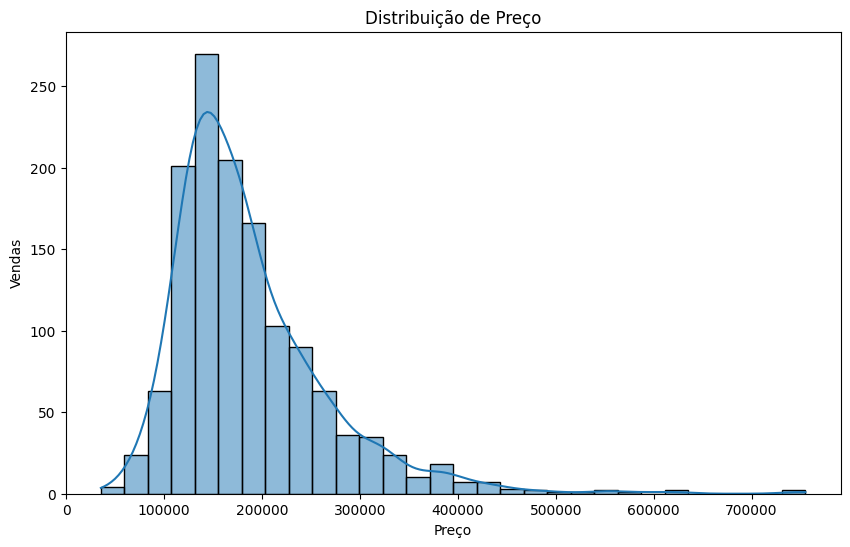

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PrecoVenda'], kde=True, bins=30)
plt.title('Distribuição de Preço')
plt.xlabel('Preço')
plt.ylabel('Vendas')
plt.show()

Os preços das casas estão concentrados entre 100 a 200 mil dolares.

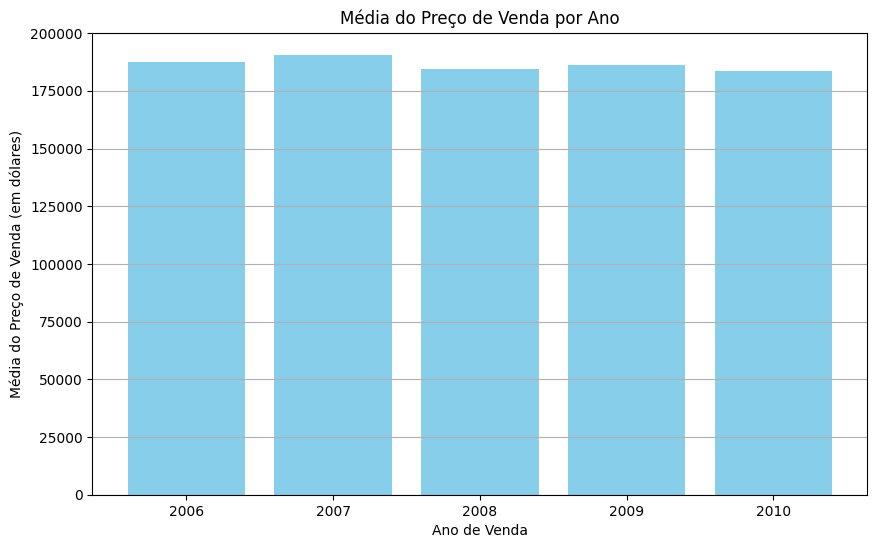

In [99]:
# Media de preço de Venda por Ano

mediaPrecoAno = df.groupby('AnoVenda')['PrecoVenda'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mediaPrecoAno['AnoVenda'], mediaPrecoAno['PrecoVenda'], color='skyblue')
plt.xlabel('Ano de Venda')
plt.ylabel('Média do Preço de Venda (em dólares)')
plt.title('Média do Preço de Venda por Ano')
plt.xticks(mediaPrecoAno['AnoVenda'])
plt.grid(axis='y')
plt.show()

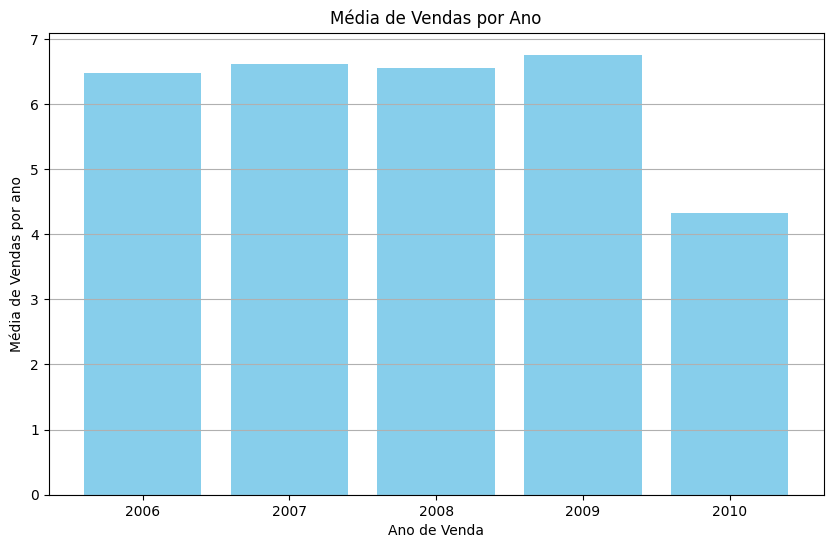

In [100]:
mediaPrecoAno = df.groupby('AnoVenda')['MesVenda'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mediaPrecoAno['AnoVenda'], mediaPrecoAno['MesVenda'], color='skyblue')
plt.xlabel('Ano de Venda')
plt.ylabel('Média de Vendas por ano')
plt.title('Média de Vendas por Ano')
plt.xticks(mediaPrecoAno['AnoVenda'])
plt.grid(axis='y')
plt.show()

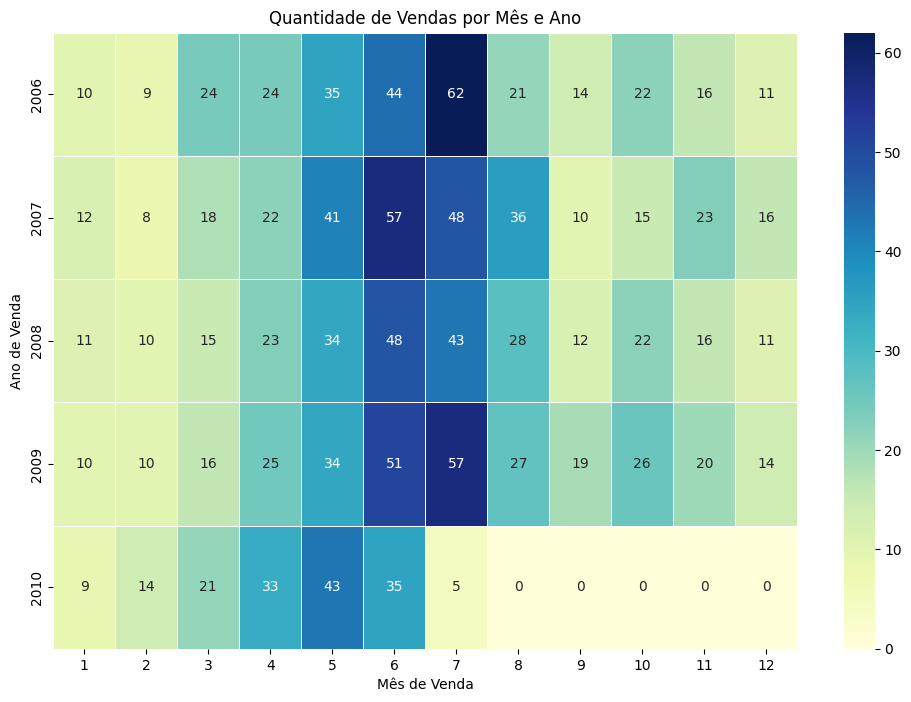

In [101]:
# Amostragem de Dados em grafico de calor, tendo a relação de quantidade de vendas por Mes
#
vendasMesAno = pd.crosstab(df['AnoVenda'], df['MesVenda'])

plt.figure(figsize=(12, 8))
sns.heatmap(vendasMesAno, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5)
plt.xlabel('Mês de Venda')
plt.ylabel('Ano de Venda')
plt.title('Quantidade de Vendas por Mês e Ano')
plt.show()

No grafico acima, podemos verificar uma grande quantidade de venda de casas entres os meses 5 a 7 de cada ano, abaixo demosntramos uma melhor visualização da relação do valor das vendas.

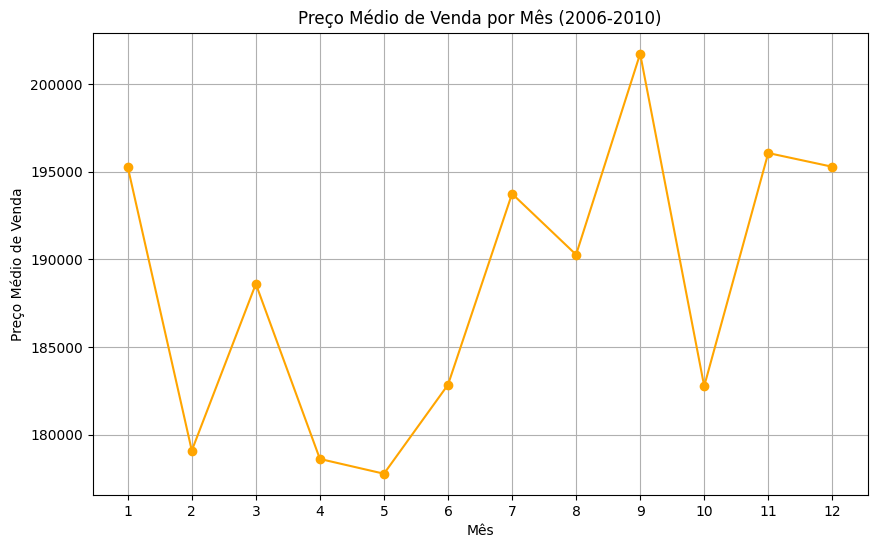

In [102]:
# Calcular preço médio de venda por mês
preco_medio_por_mes = df.groupby('MesVenda')['PrecoVenda'].mean()

plt.figure(figsize=(10, 6))
plt.plot(preco_medio_por_mes.index, preco_medio_por_mes.values, marker='o', linestyle='-', color='orange')
plt.title('Preço Médio de Venda por Mês (2006-2010)')
plt.xlabel('Mês')
plt.ylabel('Preço Médio de Venda')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [103]:
#Visualizar a distribuição dos preços das casas em diferentes meses.
df.groupby('MesVenda')['PrecoVenda'].describe()

,count,mean,std,min,25%,50%,75%,max
MesVenda,,,,,,,,
1,52.0,195271.403846,122185.159008,60000.0,124175.0,165000.0,228125.00,755000.0
2,51.0,179085.568627,52764.737628,93000.0,129750.0,173500.0,212450.00,320000.0
3,94.0,188596.723404,88049.693702,82500.0,140000.0,167120.0,211166.25,611657.0
4,127.0,178609.133858,77847.076060,68400.0,130000.0,155000.0,208900.00,555000.0
5,187.0,177766.486631,67622.526597,68500.0,130000.0,157000.0,207500.00,430000.0
6,235.0,182844.025532,68902.842893,55993.0,141750.0,166000.0,212625.00,538000.0
7,215.0,193744.032558,91557.302895,40000.0,138193.5,172500.0,218750.00,745000.0
8,112.0,190265.830357,73407.499986,64500.0,134000.0,176992.5,242500.00,426000.0
9,55.0,201731.672727,74159.338260,82000.0,139975.0,192000.0,234085.00,402861.0


Podemos perceber que no mês 09 tivemos um alta média de PrecoVenda. Abaixo vamos explorar algumas caracteristicas das casas vendidas nesse mês.

In [104]:
#Visualizar a média de Quantidade de Casas Vendidas em Setembro por Tipo de Rua
df_setembro = df[df['MesVenda'] == 9]
df_setembro.head()

,ClasseEdificio,ClassificacaoZona,FrenteLote,TamanhoLote,TipoRua,FormaLote,PlanicidadeLote,TipoUtilidades,ConfiguracaoLote,InclinacaoLote,...,AreaVarandaTresEstacoes,AreaVarandaTela,AreaPiscina,QualidadeCerca,ValorCaracteristicaMisc,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,Não Informado,0,9,2008,WD,Normal,223500.0
12,20,RL,0.0,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,176,0,Não Informado,0,9,2008,WD,Normal,144000.0
22,20,RL,75.0,9742,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,Não Informado,0,9,2008,WD,Normal,230000.0
35,60,RL,108.0,13418,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,Não Informado,0,9,2006,WD,Normal,309000.0
51,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,400,9,2006,WD,Normal,114500.0


In [105]:
# Visualizar a quantidade de casas vendidas por tipo de rua (mes 09)
quantidade_tipo_rua = df_setembro.groupby('TipoRua').size()
for tipo_rua, quantidade in quantidade_tipo_rua .items():
    print(f'Tipo de Rua: {tipo_rua}, Quantidade de Casas Vendidas: {quantidade}')

Tipo de Rua: Pave, Quantidade de Casas Vendidas: 55


In [106]:
# Visualizar a quantidade de casas vendidas por Tipo de Utilidades (mes 09)
quantidade_tipo_utilidade = df_setembro.groupby('TipoUtilidades').size()
for tipo_rua, quantidade in quantidade_tipo_utilidade.items():
    print(f'Tipo de Uitlidades: {tipo_rua}, Quantidade de Casas Vendidas: {quantidade}')

Tipo de Uitlidades: AllPub, Quantidade de Casas Vendidas: 55


In [107]:
# Visualizar a quantidade de casas vendidas por Forma do Lote (mes 09)
quantidade_forma_lote = df_setembro.groupby('FormaLote').size()
for tipo_rua, quantidade in quantidade_forma_lote.items():
    print(f'Forma do Lote: {tipo_rua}, Quantidade de Casas Vendidas: {quantidade}')

Forma do Lote: IR1, Quantidade de Casas Vendidas: 19
Forma do Lote: IR2, Quantidade de Casas Vendidas: 3
Forma do Lote: IR3, Quantidade de Casas Vendidas: 1
Forma do Lote: Reg, Quantidade de Casas Vendidas: 32


In [108]:
# Visualizar a quantidade de casas vendidas por Forma do Lote (mes 09)
quantidade_ar = df_setembro.groupby('ArCondicionadoCentral').size()
for tipo_rua, quantidade in quantidade_ar.items():
    print(f'Ar Condicionado: {tipo_rua}, Quantidade de Casas Vendidas: {quantidade}')

Ar Condicionado: N, Quantidade de Casas Vendidas: 2
Ar Condicionado: Y, Quantidade de Casas Vendidas: 53


Criação de Novas Features


In [109]:
# Idade da Casa
df['IdadeCasa'] = df['AnoVenda'] - df['AnoConstrucao'] #Verificar se é uma casa anitga ou nova (talvez)
df['TotalArea'] = df['AreaTotalPorão'] + df['Area1Andar'] + df['Area2Andar']
df['BanheiroPorQuarto'] = (df['BanheirosCompletos'] + df['MeiosBanheiros']) / df['TotalQuartosAcimaNivel']
df['TamanhoPorFrente'] = df['TamanhoLote'] / df['FrenteLote']
df['AreaTotalVaranda'] = df['AreaVarandaAberta'] + df['AreaVarandaFechada'] + df['AreaVarandaTresEstacoes'] + df['AreaVarandaTela']
df['AreaTotalExterna'] = df['AreaTotalVaranda'] + df['AreaPiscina'] + df['AreaDeckMadeira']
df['TempoDesdeRemodelacao'] = df['AnoVenda'] - df['AnoRemodelacao']

df.head()

,ClasseEdificio,ClassificacaoZona,FrenteLote,TamanhoLote,TipoRua,FormaLote,PlanicidadeLote,TipoUtilidades,ConfiguracaoLote,InclinacaoLote,...,TipoVenda,CondicaoVenda,PrecoVenda,IdadeCasa,TotalArea,BanheiroPorQuarto,TamanhoPorFrente,AreaTotalVaranda,AreaTotalExterna,TempoDesdeRemodelacao
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,208500.0,5,2566.0,0.375000,130.000000,61,61,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,WD,Normal,181500.0,31,2524.0,0.333333,120.000000,0,298,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,223500.0,7,2706.0,0.500000,165.441176,42,42,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,WD,Abnorml,140000.0,91,2473.0,0.142857,159.166667,307,307,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,WD,Normal,250000.0,8,3343.0,0.333333,169.761905,84,276,8


A partir da crianção das novas features iremos aplicar o método de transformar as colunas categóricas em númericas para rodaro algoritmo de verificar a correlação de cada coluna do dataframe com a variavel PrecoVenda. A partir das varioveis com maior correlação iremos filtra-las e prosseguir com as demais analises.

In [110]:
# Consultar colunas categóricas
colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns

print("Colunas categóricas:")
print(colunas_categoricas)

Colunas categóricas:
Index(['ClassificacaoZona', 'TipoRua', 'FormaLote', 'PlanicidadeLote',
       'TipoUtilidades', 'ConfiguracaoLote', 'InclinacaoLote', 'Bairro',
       'ProximidadeEstradaFerrovia1', 'ProximidadeEstradaFerrovia2',
       'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado',
       'RevestimentoExterior1', 'RevestimentoExterior2',
       'TipoRevestimentoAlvenaria', 'QualidadeMaterialExterior',
       'CondicaoMaterialExterior', 'TipoFundacao', 'AlturaPorão',
       'CondicaoGeralPorão', 'ParedesPorãoAcessoExterno',
       'QualidadeAreaAcabadaPorão', 'QualidadeAreaAcabadaPorão2',
       'TipoAquecimento', 'QualidadeCondicaoAquecimento',
       'ArCondicionadoCentral', 'SistemaEletrico', 'QualidadeCozinha',
       'AvaliacaoFuncionalidade', 'QualidadeLareira', 'LocalizacaoGaragem',
       'AcabamentoInteriorGaragem', 'QualidadeGaragem', 'CondicaoGaragem',
       'EntradaPavimentada', 'QualidadeCerca', 'TipoVenda', 'CondicaoVenda'],
      dtype='object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [111]:
# Aplicar o label encoding para cada coluna categórica
for coluna in colunas_categoricas:
    df[coluna] = label_encoder.fit_transform(df[coluna])

# Verificar os valores únicos de cada coluna após a codificação
for coluna in colunas_categoricas:
    print(f"Valores únicos em {coluna}: {df[coluna].unique()}")


Valores únicos em ClassificacaoZona: [3 4 0 1 2]
Valores únicos em TipoRua: [1 0]
Valores únicos em FormaLote: [3 0 1 2]
Valores únicos em PlanicidadeLote: [3 0 2 1]
Valores únicos em TipoUtilidades: [0 1]
Valores únicos em ConfiguracaoLote: [4 2 0 1 3]
Valores únicos em InclinacaoLote: [0 1 2]
Valores únicos em Bairro: [ 5 24  6 15 11 21 14 17  3 19 16 12 20  9 10 23  8 22  4  7 13  0  2 18
  1]
Valores únicos em ProximidadeEstradaFerrovia1: [2 1 4 0 5 8 6 3 7]
Valores únicos em ProximidadeEstradaFerrovia2: [2 0 7 1 4 3 6 5]
Valores únicos em TipoHabitacao: [0 1 4 2 3]
Valores únicos em EstiloHabitacao: [5 2 0 1 6 7 4 3]
Valores únicos em TipoTelhado: [1 3 2 4 0 5]
Valores únicos em MaterialTelhado: [1 7 3 6 2 5 4 0]
Valores únicos em RevestimentoExterior1: [11  7 12  5  2 13  4  8 10  0  1  9  6  3]
Valores únicos em RevestimentoExterior2: [13  8 15  6 10 14  5  3 12  0  2  7  1  9 11  4]
Valores únicos em TipoRevestimentoAlvenaria: [1 2 3 0]
Valores únicos em QualidadeMaterialExteri

In [112]:
df.head() #visualizar as primeiros registros do dataframe apõs a transformação

,ClasseEdificio,ClassificacaoZona,FrenteLote,TamanhoLote,TipoRua,FormaLote,PlanicidadeLote,TipoUtilidades,ConfiguracaoLote,InclinacaoLote,...,TipoVenda,CondicaoVenda,PrecoVenda,IdadeCasa,TotalArea,BanheiroPorQuarto,TamanhoPorFrente,AreaTotalVaranda,AreaTotalExterna,TempoDesdeRemodelacao
0,60,3,65.0,8450,1,3,3,0,4,0,...,8,4,208500.0,5,2566.0,0.375000,130.000000,61,61,5
1,20,3,80.0,9600,1,3,3,0,2,0,...,8,4,181500.0,31,2524.0,0.333333,120.000000,0,298,31
2,60,3,68.0,11250,1,0,3,0,4,0,...,8,4,223500.0,7,2706.0,0.500000,165.441176,42,42,6
3,70,3,60.0,9550,1,0,3,0,0,0,...,8,0,140000.0,91,2473.0,0.142857,159.166667,307,307,36
4,60,3,84.0,14260,1,0,3,0,2,0,...,8,4,250000.0,8,3343.0,0.333333,169.761905,84,276,8


In [113]:
# Calcular a correlação das variáveis com o preço de venda
correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['PrecoVenda'].sort_values(ascending=False)

# Filtrar as variáveis com correlação acima de 50% (ou 0.5)
high_corr_features = correlation_with_price[correlation_with_price > 0.5]

# Exibir a correlação das variaveis com o preço de venda
top_features = high_corr_features.index[1:]  # Ignorando 'PrecoVenda' que tem correlação 1 consigo mesmo


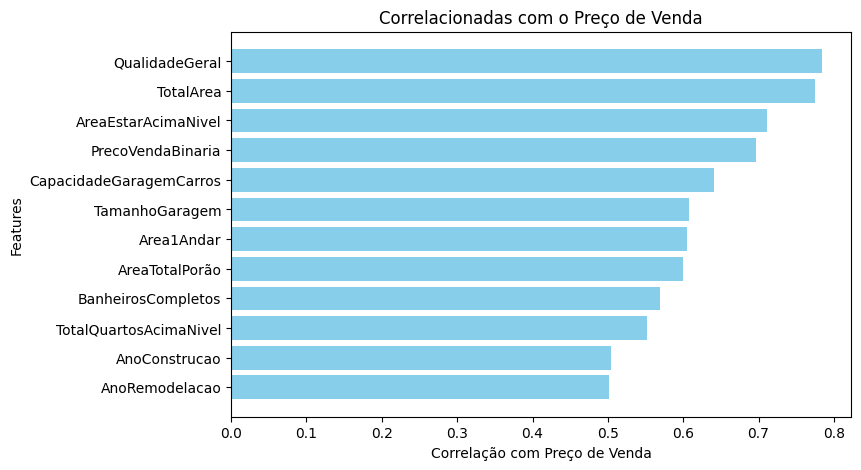

In [77]:
# Exibir as 10 variáveis mais importantes em um gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(top_features, correlation_with_price[top_features], color='skyblue')
plt.xlabel('Correlação com Preço de Venda')
plt.ylabel('Features')
plt.title('Correlacionadas com o Preço de Venda')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a feature com maior correlação apareça no topo
plt.show()

In [114]:
#Criando um novo dataframe para receber as colunas com maiores correlação em relação oa PrecoVenda
df_top_features = df[top_features]
df_top_features.head()

,QualidadeGeral,TotalArea,AreaEstarAcimaNivel,CapacidadeGaragemCarros,TamanhoGaragem,Area1Andar,AreaTotalPorão,BanheirosCompletos,TotalQuartosAcimaNivel,AnoConstrucao,AnoRemodelacao
0,7,2566.0,1710,2.0,548.0,856,856.0,2,8,2003,2003
1,6,2524.0,1262,2.0,460.0,1262,1262.0,2,6,1976,1976
2,7,2706.0,1786,2.0,608.0,920,920.0,2,6,2001,2002
3,7,2473.0,1717,3.0,642.0,961,756.0,1,7,1915,1970
4,8,3343.0,2198,3.0,836.0,1145,1145.0,2,9,2000,2000


a parti do novo dataframe com as colunas filtradas iremos realizar os próximos passos da tarefa.